<a href="https://colab.research.google.com/github/MaidanchukIrina/Portfolio/blob/main/Cleansing%2C%20joining%2C%20user%20rating%2C%20visualisation_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
applications=pd.read_csv(r'C:\Users\User\OneDrive\Desktop\applications.csv')
industries=pd.read_csv(r'C:\Users\User\OneDrive\Desktop\industries.csv')

Видалення дублікатів за стовпцем "applicant_id"

In [ ]:
applications.drop_duplicates(subset=['applicant_id'], inplace=True)

В полі 'External Rating' заповни відсутні значення нулями

In [ ]:
applications['External Rating'] = applications['External Rating'].fillna(0)

В полі 'Education level' заповни відсутні значення текстом “Середня”

In [ ]:
applications['Education level'] = applications['Education level'].fillna('Середня')

Додай до цього DataFrame дані з файлу industries.csv, а саме, рейтинги індустрій.

In [ ]:
df_combined = pd.merge(applications, industries, on='Industry', how='left')

In [ ]:
df_combined.head(10)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,11.30.2022 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0
1,11.30.2022 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20
2,11.30.2022 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10
3,11.30.2022 10:27:31,1500.0,23,Жінка,Telecom,Single,0.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,5847ac62cc9eac5e323c2517dcc91ad1,15
4,11.30.2022 10:27:34,8400.0,33,Жінка,Automotive,Single,6.0,"Вища (бакалавр, спеціаліст, магістр)",Житомир чи область,5d21f3795b50de8e8f8f8d5f48b754f3,15
5,11.30.2022 10:27:38,16500.0,31,Чоловік,E-commerce,Single,8.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,f720bf9c5c4c3e10a8568c1699847696,15
6,11.30.2022 10:27:42,4200.0,30,Чоловік,Media,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,0aaf59fb3ef90f50ccd4800312e5c271,5
7,11.30.2022 10:27:44,3600.0,24,Чоловік,E-commerce,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,aa54d6e672e4233febadbafdfd048327,15
8,11.30.2022 10:28:00,1950.0,27,Чоловік,Automotive,Married,1.0,"Вища (бакалавр, спеціаліст, магістр)",Львів чи область,2eed2883cd1673b21b2ce89d1115c245,15
9,11.30.2022 10:28:00,NaN,17,Чоловік,Інша,Married,2.0,Ще студент вишу,NaN,9c7a640dccb37d9f2164bac1deb0edfa,10


Розрахуй рейтинг заявки за наступними умовами:

Рейтинг має бути числом від 0 до 100 Рейтинг - сума оцінок заявки по 6 критеріям. Рейтинг дорівнює нулю, якщо відсутнє значення 'Amount' або якщо 'External Rating' дорівнює нулю. З чого складається рейтинг:

Якщо вік заявщика між 35 та 55, до рейтингу додається 20 балів Якщо заявка була подана не у вихідні, до рейтингу додається 20 балів Якщо заявщик одружений, до рейтингу додається 20 балів Якщо заявщик знаходиться в Києві чи області, до рейтингу додається 10 балів Значення 'Score' з таблиці industries.csv також додається до заявки (і складає від 0 до 20 балів) Якщо 'External Rating' більше чи дорівнює 7, до рейтингу додається 20 балів Якщо 'External Rating' менше чи дорівнює 2, з рейтингу віднімається 20 балів



In [ ]:
df_combined['Applied at'] = pd.to_datetime(df_combined['Applied at'], format='mixed')

In [ ]:
df_combined['Day of Week'] = df_combined['Applied at'].dt.dayofweek

In [ ]:
# Розрахунок тижня подачі заявки
df_combined['Week of Application'] = df_combined['Applied at'].dt.isocalendar().week

In [ ]:
df_combined.head(3)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Day of Week,Rating,Week of Application
0,2022-11-30 10:26:37,12000.0,29,Чоловік,Blockchain,Other,8.0,"Вища (бакалавр, спеціаліст, магістр)",Івано-Франківськ чи область,99e7b0dc6cc05dd334d8f38dc26ce9b3,0,2.0,40,48
1,2022-11-30 10:26:39,NaN,36,Чоловік,Public services / Government,Single,3.0,"Вища (бакалавр, спеціаліст, магістр)",NaN,63dfcf8e6904186650d6814279fbe42f,20,2.0,60,48
2,2022-11-30 10:26:58,7500.0,34,Чоловік,Adtech / Advertising,Single,4.0,"Вища (бакалавр, спеціаліст, магістр)",Київ чи область,10dbafaeb46c09e96b6987c03bbb3498,10,2.0,30,48


In [ ]:
df_combined['Rating'] = (
    ((df_combined['Age'].between(35, 55)) * 20) +
    ((df_combined['Day of Week'] < 5) * 20) +
    ((df_combined['Marital status']=='Married') * 20) +
    ((df_combined['Location'].isin(['Київ', 'Київ, область'])) * 10) +
    df_combined['Score'] +
    ((df_combined['External Rating'] >= 7) * 20) -
    ((df_combined['External Rating'] <= 2) * 20)
)

In [ ]:
df_combined_accepted = df_combined[df_combined['Rating'] > 0]

In [ ]:
# Групування за тижнем та розрахунок середнього рейтингу
df_weekly_avg_rating = df_combined_accepted.groupby('Week of Application')['Rating'].mean().reset_index()

In [ ]:
print(df_weekly_avg_rating)

   Week of Application     Rating
0                   48  49.474967
1                   50  44.183835
2                   51  43.422699
3                   52  46.919918


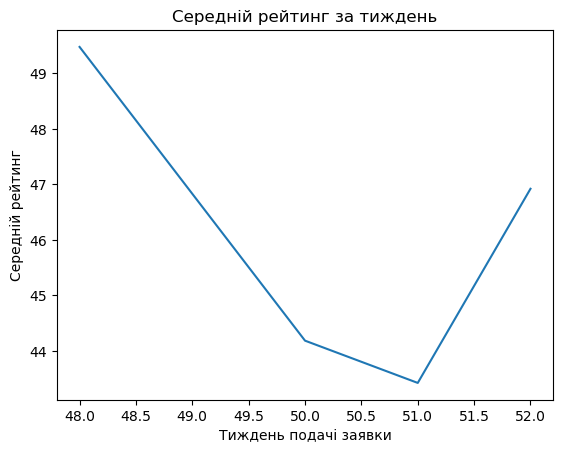

In [ ]:
plt.plot(df_weekly_avg_rating['Week of Application'], df_weekly_avg_rating['Rating'])
plt.xlabel('Тиждень подачі заявки')
plt.ylabel('Середній рейтинг')
plt.title('Середній рейтинг за тиждень')
plt.show()